In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

### my library

import utils
import images
import distances
import transforms

In [2]:
##########


# MNIST rotational alignment distance test


###########

In [3]:
mnist_image_file = 'Data/t10k-images-idx3-ubyte.gz'
mnist_images = utils.load_mnist_images(mnist_image_file)

L = 65  # size of image

img = mnist_images[1]
img = utils.zero_pad_image_stack_to_size(img, 65)[0]
img = img / np.sum(img)  # normalize to sum = 1

imgs = np.array([img, utils.rotate(img, 180)])

In [4]:
n_points = L  # number of points on Fourier slice
proj_angles = np.arange(0, 360) # angles of slices
# proj_angles = np.linspace(0, 360, L, endpoint=False)  # angles of slices
### EV: note that we normally set number of slices = L
###     but I'm using arange here so that theta=180 is used

Uc = transforms.Transform(imgs, n_points=n_points, angles=proj_angles, apply_ramp=False).cdf_transform()
Ui = transforms.Transform(imgs, n_points=n_points, angles=proj_angles, apply_ramp=False).inverse_cdf_transform()
Ui_p, Ui_n = transforms.Transform(imgs, n_points=n_points, angles=proj_angles, apply_ramp=True).signed_inverse_cdf_transform()

dists_sc2 = distances.rotational_distances(Uc[0], Uc[1])
dists_sw2 = distances.rotational_distances(Ui[0], Ui[1])
dists_ssw2 = distances.signed_rotational_distances(Ui_p[0], Ui_p[1], Ui_n[0], Ui_n[1])
dists_l2 = distances.real_space_rotational_distances(imgs[0], imgs[1], proj_angles)

In [5]:
print('            sliced 2-Cramer: ', proj_angles[np.argmin(dists_sc2)], np.amin(dists_sc2))
print('       sliced 2-Wasserstein: ', proj_angles[np.argmin(dists_sw2)], np.amin(dists_sw2))
print('signed sliced 2-Wasserstein: ', proj_angles[np.argmin(dists_ssw2)], np.amin(dists_ssw2))
print('                  Euclidean: ', proj_angles[np.argmin(dists_l2)], np.amin(dists_l2))

            sliced 2-Cramer:  180 -3.637978807091713e-12
       sliced 2-Wasserstein:  180 3.637978807091713e-12
signed sliced 2-Wasserstein:  180 9.094947017729282e-13
                  Euclidean:  180 2.090928720455298e-33


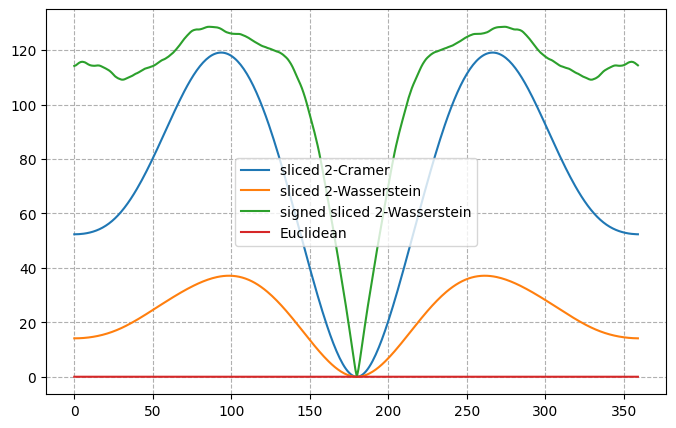

In [6]:
plt.figure(figsize=(8,5))
plt.plot(proj_angles, dists_sc2, label='sliced 2-Cramer')
plt.plot(proj_angles, dists_sw2, label='sliced 2-Wasserstein')
plt.plot(proj_angles, dists_ssw2, label='signed sliced 2-Wasserstein')
plt.plot(proj_angles, dists_l2, label='Euclidean')
plt.grid(which='major', linestyle='--')
plt.legend()
plt.show()

In [7]:
##########


# Gaussian blob Radon transform test


###########

In [8]:
L = 129

img = np.zeros((L,L))
img[L//2, L//2] = 1

sigma = 5  # Gaussian spread
g = utils.generate_centered_gaussian(L=L, d=2, sigma=sigma)
f = utils.signal_convolution(img, g)
f = f / np.sum(f)

n_points = L
proj_angles = np.linspace(0, 360, L, endpoint=False)
f_rt = transforms.Transform(f, n_points=n_points, angles=proj_angles, apply_ramp=False).radon_transform()

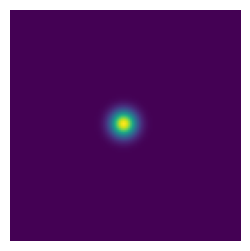

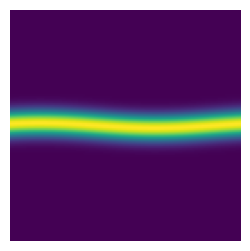

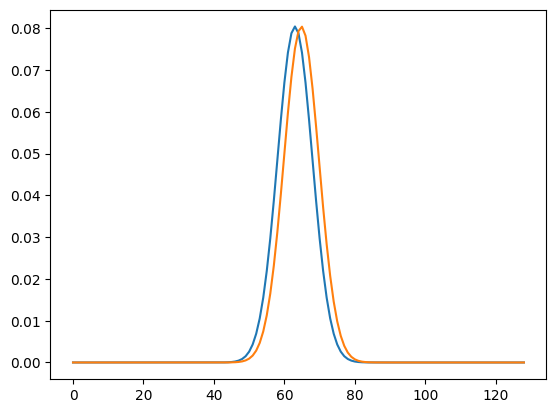

In [9]:
plt.figure(figsize=(3,3))
plt.imshow(f)
plt.axis('off')
plt.show()
plt.figure(figsize=(3,3))
plt.imshow(f_rt[0])
plt.axis('off')
plt.show()

p = np.arange(0, L, L//5)
plt.plot(f_rt[0, :, p[0]])
plt.plot(f_rt[0, :, p[4]])
plt.show()